In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import datetime
import torchvision
from torchvision.datasets import MNIST
from google.colab import drive
import copy
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class Model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                              #  nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.ReLU(), 
                               nn.Flatten(),    
                               nn.Linear(784, 400),
                              #  nn.Linear(196, 100),
                               nn.Linear(400, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    # print(type(self.datasets.train_data))
  def forward(self, x):
    return nn.Softmax(dim=1)(self.model(x))


In [ ]:
class Model2(Model1):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.Conv2d(8, 8, (3,3), stride = 1, padding='same'),
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 2, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.ReLU(), 
                               nn.Flatten(),    #
                               nn.Linear(392, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))



In [ ]:
class Model3(Model1):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.Conv2d(8, 8, (3,3), stride = 1, padding='same'),
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (3,3), stride = 1, padding = 'same'), #15x15x6
                              #  nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.ReLU(), 
                               nn.Flatten(),    #
                               nn.Linear(784, 400),
                               nn.Linear(400, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))



In [ ]:
class Model4(Model1):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Conv2d(1, 32, (3,3), stride = 1, padding = 'same'),    #28x28x32
                                nn.Conv2d(32, 64, (5,5), stride = 1, padding = 'same'),   #28x28x64
                                nn.ReLU(), 
                                nn.Conv2d(64, 64, (5,5), stride = 1, padding='same'),     #28x28x64
                                nn.MaxPool2d((2, 2), stride = 2),                         #14x14x64
                                nn.Conv2d(64, 64, (5,5), stride = 1, padding = 'same'),   #14x14x64
                                nn.MaxPool2d((2, 2), stride = 2),                         #7x7x64
                                nn.ReLU(), 
                                nn.Flatten(),                                             #3136
                                nn.Linear(3136, 400),
                                nn.Linear(400, 100),
                                nn.Linear(100, 10))
        self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
        self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    
    def forward(self, x):
        x = x.to(self.device)
        print(x.device)
        return nn.Softmax(dim=1)(self.model(x.to(self.device)))

In [ ]:
model = Model4()
model.eval()

Model4(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=3136, out_features=400, bias=True)
    (10): Linear(in_features=400, out_features=100, bias=True)
    (11): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
def model_state_dict(path):
  from collections import OrderedDict
  new_state_dict = OrderedDict()
  state_dict = torch.load(path, map_location=device)
  for k, v in state_dict.items():
      # print(k)
      # print(v)
      name = 'model.' + k  # add `model.`
      # print(name)
      new_state_dict[name] = v
  return new_state_dict

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')


In [ ]:
class Adv():
  def __init__(self, model_dict):
    super().__init__()
    self.model = {}
    self.loss_fn = nn.CrossEntropyLoss()
    
    for key, value in model_dict.items():
      # print(key)
      self.model[key] = value[0]
      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      # self.model[key].load_state_dict(copy.deepcopy(torch.load(value[2], device)))
      self.model[key].load_state_dict(value[1])
      # print(key,  value[1])
      # print(key, self.model[key].model.device)
      # self.model[key].to(device)
      self.model[key].eval()
    # print(self.model)

  def pred(self, x, y):
    loss = 0
    ypred = {}
    for key, value in self.model.items():
    #   print(key, value.model)
      output = value.model(x)
      loss += self.loss_fn(output, y)
      _, ypred[key] = torch.max(value.model(x), 1)
    # for key, value in ypred.items():
    # #   loss += self.loss_fn(y, ypred[key]) 
    #     loss += self.loss_fn(y, )
    return ypred, loss

  def linbp_relu(self, x):
    x_p = F.relu(-x)
    x = x + x_p.data
    return x

  def model_fwd(self, model, x, linbp, linbp_layer):
    # x = model[0](x)
    for idx in range(len(list(model))):
        if linbp and isinstance(model[idx], nn.ReLU) and idx >= linbp_layer:
            x = self.linbp_relu(x)
        else:
            x = model[idx](x)
    x = x.view(x.size(0), -1)
    # x = model[1].classifier(x)
    return x

In [ ]:
Path1 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_1/2022-04-06 21:21/epoch_20.pth"
Path2 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_2/2022-04-06 21:37/epoch_20.pth"
Path3 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_3/2022-04-07 06:38/epoch_20.pth"

In [ ]:
model1 = Model1().to(device)
state_dict1 = model_state_dict(Path1) 

model2 = Model2().to(device)
state_dict2 = model_state_dict(Path2) 

model3 = Model3().to(device)
state_dict3 = model_state_dict(Path3)

model_dict = {'model1': (model1, state_dict1, Path1), 'model2': (model2, state_dict2, Path2), 'model3': (model3, state_dict3, Path3) }
# model_dict = {'model1': (model1, state_dict1), 'model2': (model2, state_dict2)}
# print(model_dict['model1'][1])
adv = Adv(model_dict)

## Trying an attack

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=True)

In [ ]:
# for idx, data in enumerate(train_dl):
#   ori_img = data[0]
#   label = data[1]

ori_img, label = next(iter(train_dl))

In [ ]:
img = ori_img.clone()
img_x = img
## enabling the gradients before the forward pass
img_x.requires_grad_(True)

output = adv.model_fwd(adv.model['model1'].model, img_x, True, 2)
print('Output from custom forward: ', output)

output_ori = adv.model['model1'].model(ori_img)
print('Output from original forward: ', output_ori)

Output from custom forward:  tensor([[  1.4330,   2.6350,   8.9024,   4.0983,  -6.2603,  -0.1581,   7.7818,
         -10.8947,   0.7257,  -6.6532]], grad_fn=<ViewBackward0>)
Output from original forward:  tensor([[  1.4330,   2.6350,   8.9024,   4.0983,  -6.2603,  -0.1581,   7.7818,
         -10.8947,   0.7257,  -6.6532]], grad_fn=<AddmmBackward0>)


In [ ]:
# target_attack = True
target_attack = False 
model = adv.model['model1'].model
epsilon = 0.1

In [ ]:
# loss.backward(retain_graph=True)
m = 0
iters = 1000
for i in range(iters):
    loss = 0
    for key in adv.model.keys():
        output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
        # print(output.device, label.device)
        loss += nn.CrossEntropyLoss()(output.to(device), label.to(device))
    model.zero_grad()
    loss.backward()
    g = img_x.grad.data
    input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
    m = input_grad
    if target_attack:
        input_grad = -input_grad
    img = img.data + torch.sign(input_grad)
    img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
    img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
    img = torch.clamp(img, min=0, max=1)


attacked image


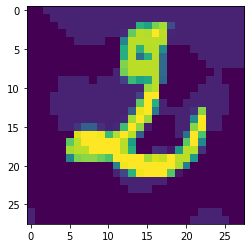

original image


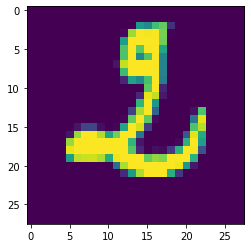

In [ ]:
import matplotlib.pyplot as plt
print("attacked image")
plt.imshow(torch.squeeze(img.detach()).numpy())
plt.show()
print("original image")
plt.imshow(torch.squeeze(ori_img.detach()).numpy())
plt.show()

In [ ]:
torch.max(img-ori_img)

tensor(0.1000)

In [ ]:
pred, loss = adv.pred(img, label)
print(pred)
print(label)
print(loss)

{'model1': tensor([5]), 'model2': tensor([5])}
tensor([9])
tensor(5.4961, grad_fn=<AddBackward0>)


In [ ]:
pred, loss = adv.pred(ori_img, label)
print(pred)
print(label)
print(loss)

{'model1': tensor([9]), 'model2': tensor([9])}
tensor([9])
tensor(0.1823, grad_fn=<AddBackward0>)


# Success Rate vs Epsilon

In [ ]:
Path4 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_4/2022-04-09 10:09/epoch_20.pth"
target_model = Model4().to(device)
state_dict = model_state_dict(Path4)
target_model.load_state_dict(state_dict)

<All keys matched successfully>

### FULL (LinBP + MI-FGSM + Ensemble)

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone().to(device)
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            for key in adv.model.keys():
                output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
                loss += nn.CrossEntropyLoss()(output, label.to(device))
                adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        _, ypred = torch.max(target_model(img), 1)
        # print(f'ypred = {ypred}, label = {label}')
        if ypred!=label:
            success+=1
    
    success_rates.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

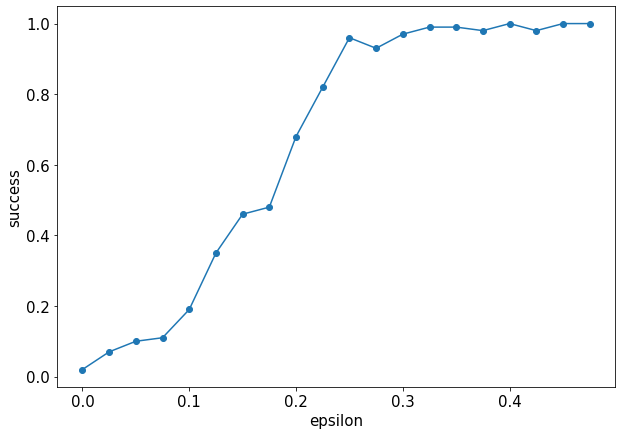

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()

### LinBP + MI-FGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_LM = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates_LM.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

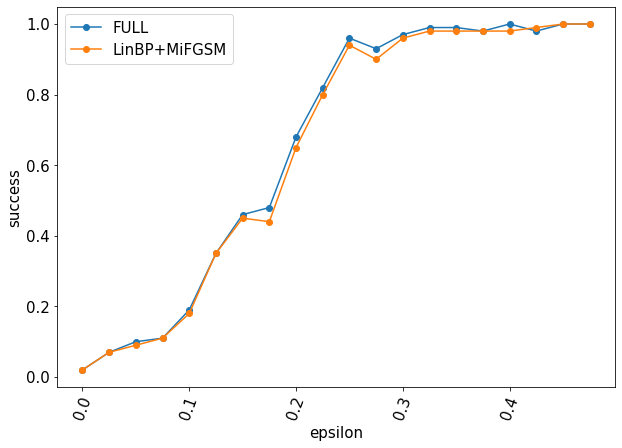

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
# plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
# plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.xticks(rotation=70)
plt.legend()
plt.show()

### LinBP

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_L = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            # input_grad = 1*m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            # m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates_L.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

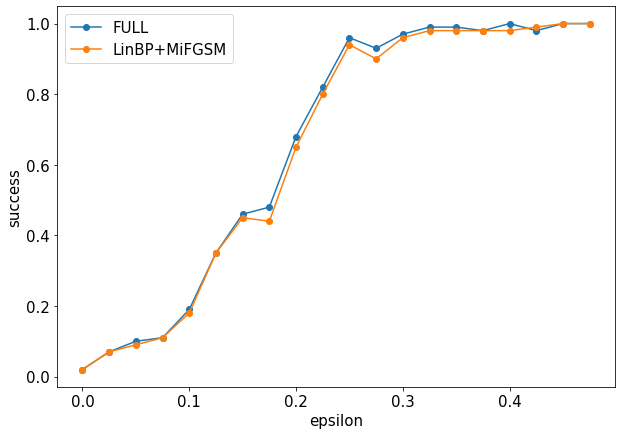

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
# plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.legend()
plt.show()

### MiFGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_M = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            # output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            output = adv.model[key].model(img_x)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            # input_grad = g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            input_grad = 1*m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates_M.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

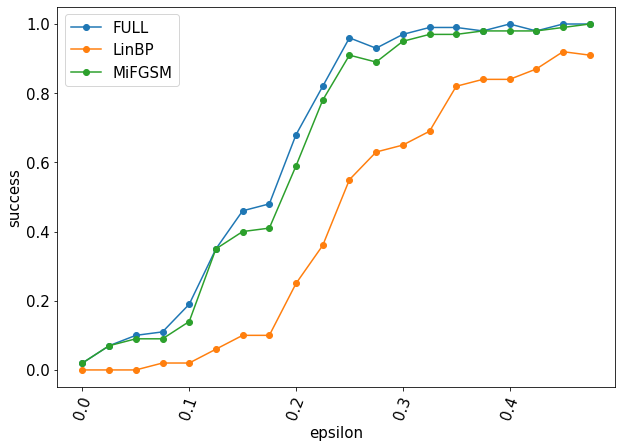

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
# plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.xticks(rotation=70)
plt.legend()
plt.show()

### FULL (LinBP + MI-FGSM + Ensemble)

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)

success_rates = []
for epsilon in [0.01*i for i in range(10)]:
    success = 0
    for i in range(100):
        ori_img, label = next(iter(train_dl))
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone().to(device)
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 1000
        for i in range(iters):
            loss = 0
            for key in adv.model.keys():
                output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
                loss += nn.CrossEntropyLoss()(output, label.to(device))
                adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

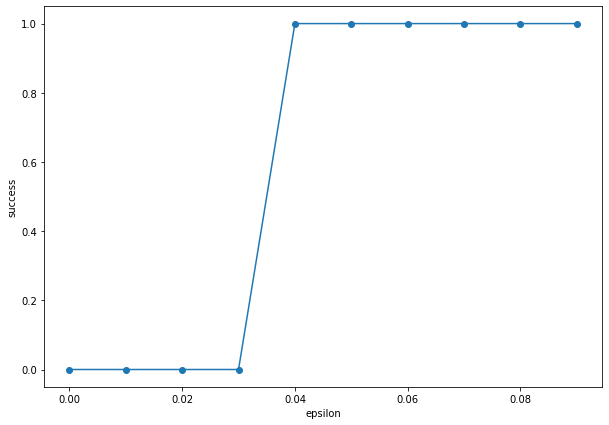

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([0.01*i for i in range(10)], success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()

### LinBP + MI-FGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)

success_rates = []
for epsilon in [0.01*i for i in range(10)]:
    success = 0
    for i in range(100):
        ori_img, label = next(iter(train_dl))
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 1000
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

In [ ]:
success_rates

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

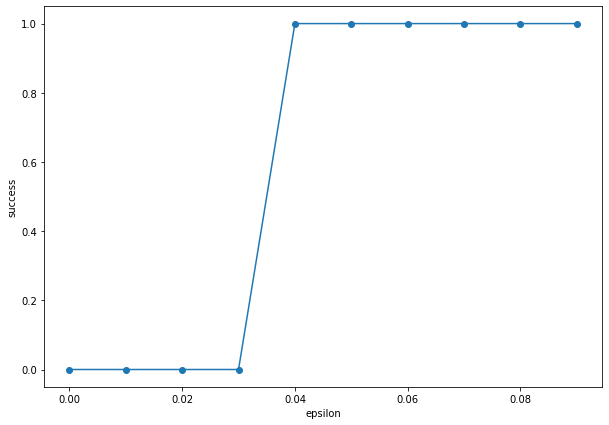

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([0.01*i for i in range(10)], success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()

# Success Rate vs epsilon for ResNet victim model

In [ ]:
def change_layers(model):
    model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.fc = nn.Linear(2048, 10, bias=True)
    return model

In [ ]:
Res_Path = "/content/drive/MyDrive/CS726 Project/CS726_project/RESNET50/RESNET50/2022-05-05 15:46/epoch_901.pth"

from torchvision.models import resnet50
resnet = resnet50(pretrained = False)
target_model = change_layers(resnet).to(device)
# state_dict = model_state_dict(Res_Path)
target_model.load_state_dict(torch.load(Res_Path))
target_model.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### FULL (LinBP + MI-FGSM + Ensemble)

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone().to(device)
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            for key in adv.model.keys():
                output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
                loss += nn.CrossEntropyLoss()(output, label.to(device))
                adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        _, ypred = torch.max(target_model(img), 1)
        # print(f'ypred = {ypred}, label = {label}')
        if ypred!=label:
            success+=1
    
    success_rates.append(success/100)

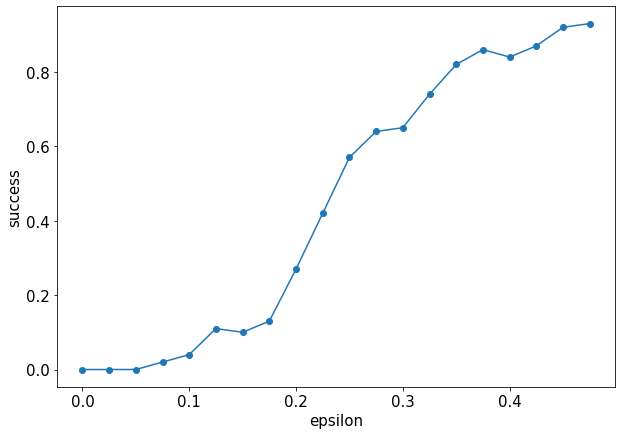

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()

### LinBP + MI-FGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_LM = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 0.75 * m + (g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True))
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates_LM.append(success/100)

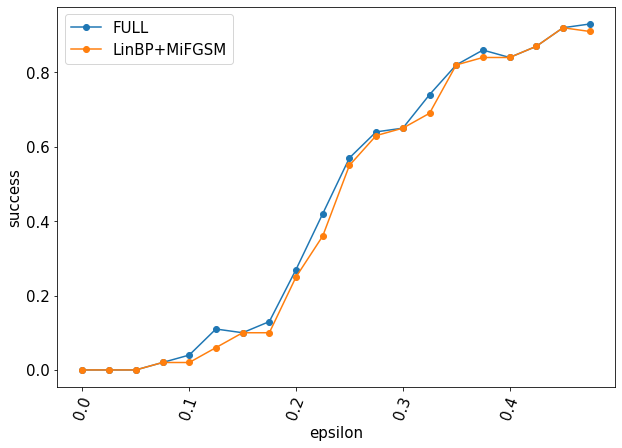

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
# plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
# plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.xticks(rotation=70)
plt.legend()
plt.show()

### LinBP

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_L = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            # input_grad = 1*m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            # m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates_L.append(success/100)

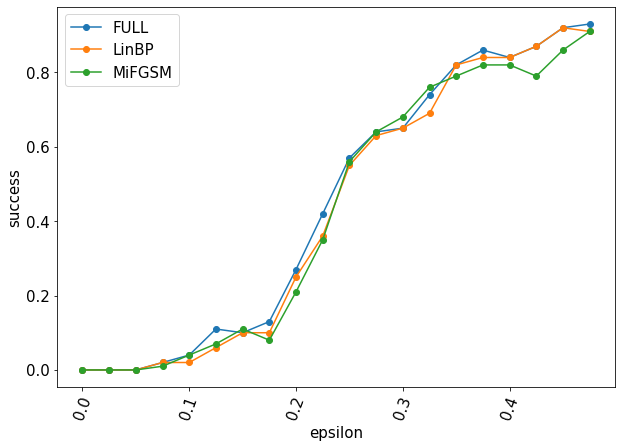

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
# plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.xticks(rotation=70)
plt.legend()
plt.show()

### MiFGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_M = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(100):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            # output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            output = adv.model[key].model(img_x)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            # input_grad = g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            input_grad = 1*m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates_M.append(success/100)

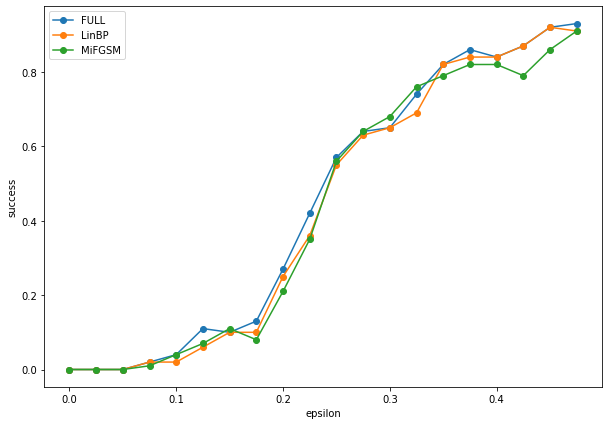

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
# plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.legend()
plt.show()

# Success Rate vs epsilon for ResNet victim model

In [ ]:
Path = "/content/drive/MyDrive/CS726 Project/CS726_project/MOBILENET/2022-05-05 21:08/epoch_931.pth"

from torchvision.models.mobilenet import mobilenet_v2
target_model = mobilenet_v2(pretrained = False).to(device)
target_model.classifier[1] = torch.nn.Linear(in_features=target_model.classifier[1].in_features, out_features=10)
target_model.load_state_dict(torch.load(Path))
target_model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

### FULL (LinBP + MI-FGSM + Ensemble)

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(50):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone().to(device)
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            for key in adv.model.keys():
                output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
                loss += nn.CrossEntropyLoss()(output, label.to(device))
                adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        _, ypred = torch.max(target_model(img.repeat(1,3,1,1)), 1)
        # print(f'ypred = {ypred}, label = {label}')
        if ypred!=label:
            success+=1
    
    success_rates.append(success/50)

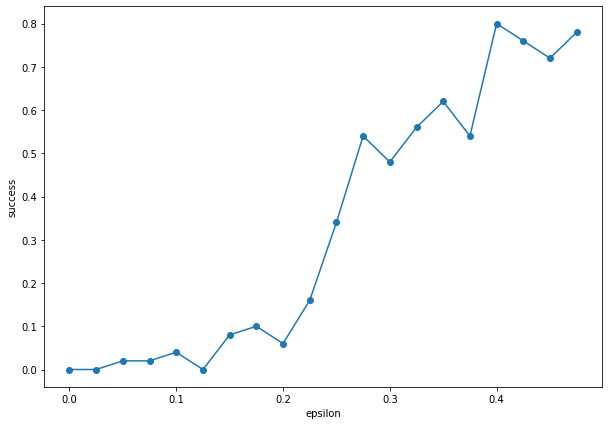

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()

### LinBP + MI-FGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_LM = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(50):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 0.75 * m + (g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True))
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img.repeat(1,3,1,1)), 1)
        if ypred!=label:
            success+=1
    
    success_rates_LM.append(success/50)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


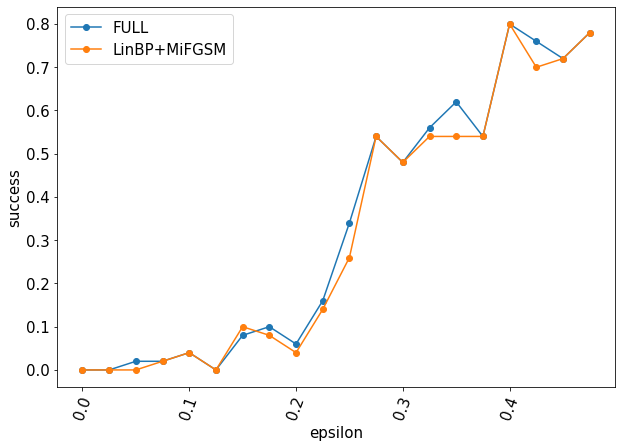

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
# plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
# plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.xticks(rotation=70)
plt.legend()
plt.show()

### LinBP

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_L = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(50):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            # input_grad = 1*m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            # m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img.repeat(1,3,1,1)), 1)
        if ypred!=label:
            success+=1
    
    success_rates_L.append(success/50)

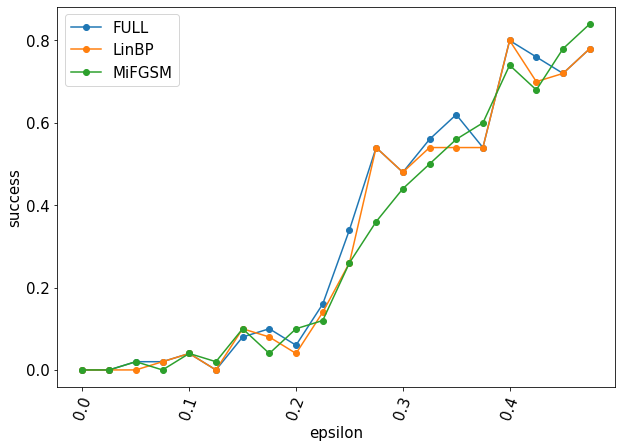

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
# plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.xticks(rotation=70)
plt.legend()
plt.show()

### MiFGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)
train_iter = iter(train_dl)
success_rates_M = []
eps_vals = [0.025*i for i in range(20)]
for epsilon in eps_vals:
    success = 0
    for i in range(50):
        ori_img, label = next(train_iter)
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 4
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            # output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            output = adv.model[key].model(img_x)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            # input_grad = g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            input_grad = 1*m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img.repeat(1,3,1,1)), 1)
        if ypred!=label:
            success+=1
    
    success_rates_M.append(success/50)

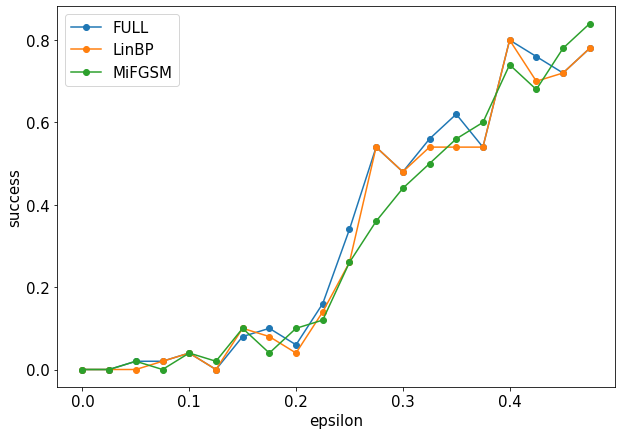

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(eps_vals, success_rates, marker='o', label='FULL')
# plt.plot(eps_vals, success_rates_LM, marker='o', label='LinBP+MiFGSM')
plt.plot(eps_vals, success_rates_L, marker='o', label='LinBP')
plt.plot(eps_vals, success_rates_M, marker='o', label='MiFGSM')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.legend()
plt.show()